In [31]:
# open accelData pickle
import pickle
with open('drive/MyDrive/Pickles/accelData.pickle', 'rb') as handle:
    accelData = pickle.load(handle)

In [3]:
print(accelData)

{'Measurements': [         Time   AccXRA   AccYRA   AccZRA   AccXLA   AccYLA   AccZLA   AccXRW  \
0      231.57  0.07910  0.02148 -0.98242  0.07031  0.49902 -0.85840 -0.89062   
1      231.58  0.08691  0.02344 -0.98828  0.07031  0.50391 -0.86035 -0.90430   
2      231.59  0.08691  0.02344 -0.97949  0.07129  0.50488 -0.86133 -0.91797   
3      231.60  0.08398  0.02637 -0.99023  0.07129  0.50488 -0.86133 -0.91797   
4      231.61  0.07324  0.02637 -0.96387  0.06738  0.50488 -0.86133 -0.89355   
...       ...      ...      ...      ...      ...      ...      ...      ...   
69033  921.90 -0.83008  0.26562  0.50098  1.16309  0.04394  0.03320  0.76562   
69034  921.91 -0.83301  0.26562  0.49512  1.10840  0.04102  0.03320  0.76562   
69035  921.92 -0.83105  0.26562  0.49512  1.07910  0.03711  0.05664  0.76562   
69036  921.93 -0.83398  0.26465  0.49219  1.00098  0.03711  0.08691  0.76562   
69037  921.94 -0.83594  0.26465  0.48730  0.75977  0.07910  0.09180  0.76562   

        AccYRW   AccZ

In [5]:
# Print number of unique values in accelData['Code'] which is a list
print(len(set(accelData['Code'])))


35


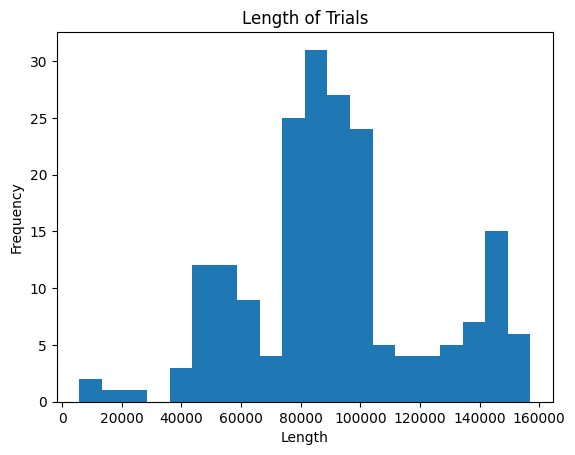

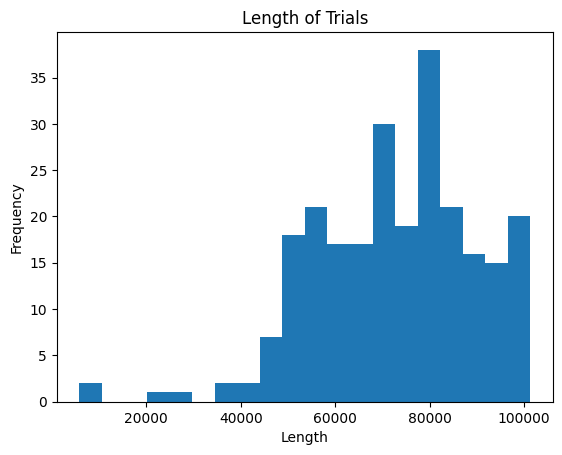

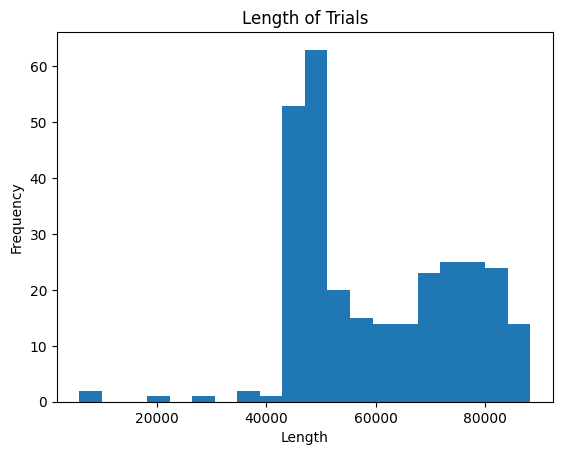

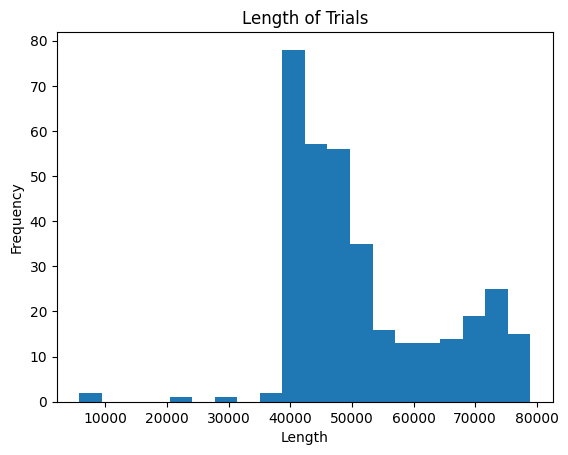

In [32]:
# Necessary imports
import numpy as np
import matplotlib.pyplot as plt
for i in range(4):
    K = 50

    # Split some of the longer trials in half
    numRowsAccel = [df.shape[0] for df in accelData['Measurements']]
    sortedIndices = np.argsort(numRowsAccel)

    # Get the indices of the top k dataframes
    topKIndices = sortedIndices[-K:]

    # Get the top k dataframes
    topKDataframes = [accelData['Measurements'][i] for i in topKIndices]

    # Get the top k corresponding months, IDs, labels
    topKMonths = [accelData['Month'][i] for i in topKIndices]
    topKCodes = [accelData['Code'][i] for i in topKIndices]
    topKAbnormal = [accelData['Abnormal'][i] for i in topKIndices]
    topKAIMS = [accelData['AIMS'][i] for i in topKIndices]
    topKOptimality = [accelData['Optimality'][i] for i in topKIndices]

    # Remove the dataframes from accelData
    for i in sorted(topKIndices, reverse=True):
        del accelData['Measurements'][i]
        del accelData['Month'][i]
        del accelData['Code'][i]
        del accelData['Abnormal'][i]
        del accelData['AIMS'][i]
        del accelData['Optimality'][i]

    # Split the top k dataframes into two and reinsert into structure
    for i in range(len(topKDataframes)):
        df = topKDataframes[i]
        month = topKMonths[i]
        code = topKCodes[i]
        abnormal = topKAbnormal[i]
        aims = topKAIMS[i]
        optimality = topKOptimality[i]
        
        first_half = df.iloc[0:df.shape[0]//2]
        second_half = df.iloc[df.shape[0]//2:df.shape[0]]
        
        # Append the first and second halves to accelData
        accelData['Measurements'].append(first_half)
        accelData['Measurements'].append(second_half)
        
        # Append the corresponding values for month, code, abnormal, aims, and optimality
        accelData['Month'].extend([month, month])
        accelData['Code'].extend([code, code])
        accelData['Abnormal'].extend([abnormal, abnormal])
        accelData['AIMS'].extend([aims, aims])
        accelData['Optimality'].extend([optimality, optimality])

    # PLot histogram of length of trials
    lengths = [len(accelData['Measurements'][i]) for i in range(len(accelData['Measurements']))]
    plt.hist(lengths, bins=20)
    plt.title("Length of Trials")
    plt.xlabel("Length")
    plt.ylabel("Frequency")
    plt.show()
        
    # Memory management
    del numRowsAccel, sortedIndices, topKIndices, topKDataframes, topKMonths, topKCodes, topKAbnormal, topKAIMS, topKOptimality, first_half, second_half, df, month, code, abnormal, aims, optimality

In [33]:
accelDataGrouped = {}

for i in range(len(accelData['Code'])):
    code = accelData['Code'][i]
    if code not in accelDataGrouped:
        accelDataGrouped[code] = {'Measurements': [], 'Month':[], 'Abnormal':[], 'AIMS':[], 'Optimality':[]}
    accelDataGrouped[code]['Measurements'].append(accelData['Measurements'][i])
    accelDataGrouped[code]['Month'].append(accelData['Month'][i])
    accelDataGrouped[code]['Abnormal'].append(accelData['Abnormal'][i])
    accelDataGrouped[code]['AIMS'].append(accelData['AIMS'][i])
    accelDataGrouped[code]['Optimality'].append(accelData['Optimality'][i])

# Print accelDataGrouped without the measurements bit
for key, value in accelDataGrouped.items():
    print(key, value['Month'], value['Abnormal'], value['AIMS'], value['Optimality'])


1023 [1] [1.0] [999] [14]
1020 [1, 2, 3] [1.0, 0.0, 0.0] [999, 3, 999] [30, 31, 26]
1019 [1, 2, 4, 4, 5, 5, 5, 5, 3, 3, 3, 3] [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] [0, 1, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0] [13, 23, 8, 8, 9, 9, 9, 9, 6, 6, 6, 6]
1018 [0, 1, 2, 5, 5, 4, 4, 3, 3, 3, 3] [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] [1, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0] [14, 24, 23, 15, 15, 15, 15, 13, 13, 13, 13]
1017 [0, 1, 2, 6, 5, 5, 4, 4, 4, 4] [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] [999, 1, 1, 0, 0, 0, 0, 0, 0, 0] [29, 27, 21, 999, 9, 9, 7, 7, 7, 7]
1016 [2, 3, 5, 5, 4, 4, 4, 4, 6, 6, 6, 6, 1, 1, 1, 1] [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [3, 3, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2] [29, 24, 26, 26, 28, 28, 28, 28, 999, 999, 999, 999, 37, 37, 37, 37]
1014 [1, 2, 4, 4, 3, 3] [0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1, 1, 0, 0, 999, 999] [33, 32, 26, 26, 26, 26]
1013 [1, 2, 6, 6, 4, 4, 4, 4, 3, 3, 3, 3] [1.0, 0.0

In [34]:
# Print number of trials
print(len(accelData['Measurements']))

347


In [35]:
# Remove time column from accelData Measurements
accelData['Measurements with Time'] = accelData['Measurements']

for i in range(len(accelData['Measurements'])):
    accelData['Measurements'][i] = accelData['Measurements'][i].iloc[:, 1:]

In [36]:
# Smooth the normalised data using a moving average (mean)
accelData['Smoothed (mean)'] = []
# Smooth the data using a moving average (median)
accelData['Smoothed (median)'] = []

for i in range(len(accelData['Measurements'])):
    df = accelData['Measurements'][i]

    # Mean smoothing
    smoothed_mean = df.rolling(window=10).mean()
    smoothed_mean = smoothed_mean.fillna(df)
    # downsampling
    smoothed_mean = smoothed_mean.groupby(smoothed_mean.index // 10).mean()
    accelData['Smoothed (mean)'].append(smoothed_mean)

    # Median smoothing
    smoothed_med = df.rolling(window=10).median()
    smoothed_med = smoothed_med.fillna(df)
    # downsampling
    smoothed_med = smoothed_med.groupby(smoothed_med.index // 10).median()
    accelData['Smoothed (median)'].append(smoothed_med)


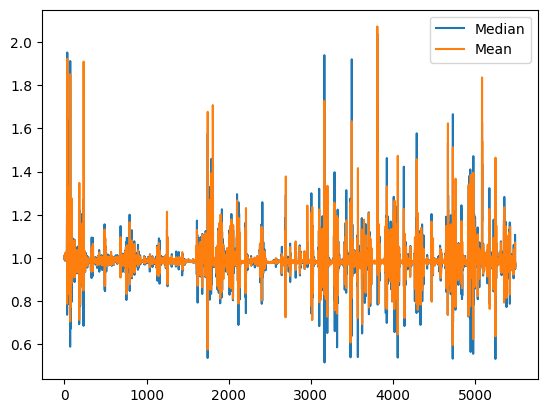

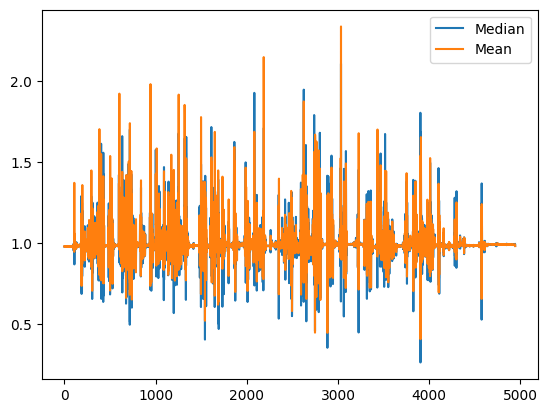

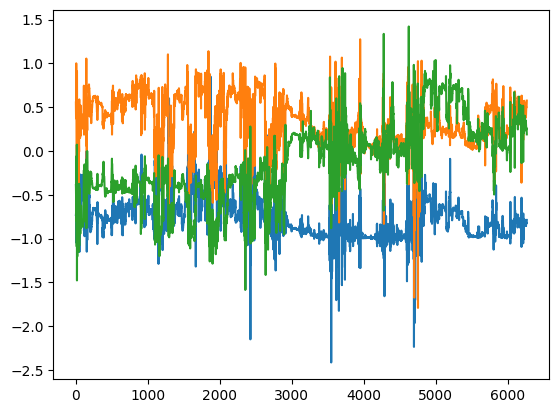

In [28]:
# Visualise the smoothing
# Visualise the normalised data
plt.plot(accelData['Smoothed (median)'][0]['AccSumRW'], label='Median')
plt.plot(accelData['Smoothed (mean)'][0]['AccSumRW'], label='Mean')
plt.legend()
plt.show()

plt.plot(accelData['Smoothed (median)'][1]['AccSumRW'], label='Median')
plt.plot(accelData['Smoothed (mean)'][1]['AccSumRW'], label='Mean')
plt.legend()
plt.show()

plt.plot(accelData['Smoothed (median)'][2]['AccXRA'], label='Median')
plt.plot(accelData['Smoothed (median)'][2]['AccYRA'], label='Median')
plt.plot(accelData['Smoothed (median)'][2]['AccZRA'], label='Median')


In [ ]:
# Normalised the smoothed data so that the accSumRW, accSumRA, accSumLW, accSumLA columns when they have a value of 1, 
# the value stays at 1
accelData['Normalised Smoothed'] = []

for i in range(len(accelData['Measurements'])):

    df = accelData['Smoothed (median)'][i]

    # Normalise the data
    df = df / df.max()

    # Replace NaNs with 0
    df = df.fillna(0)

    accelData['Normalised Smoothed'].append(df)

# Visualise the data


In [1]:
# Normalise the measurements for each trial so that the zeros stay at zero, and the max, min values are -1, 1
accelData['Mean, Normalised'] = []
accelData['Median, Normalised'] = []

for i in range(len(accelData['Measurements'])):
    df = accelData['Smoothed (mean)'][i]
    df = (df - df.min()) / (df.max() - df.min())
    df = 2 * df - 1
    accelData['Mean, Normalised'].append(df)

    df = accelData['Smoothed (median)'][i]
    df = (df - df.min()) / (df.max() - df.min())
    df = 2 * df - 1
    accelData['Median, Normalised'].append(df)

print(accelData['Mean, Normalised'][0]['AccSumRW'].head())

# Visualise the normalised data
plt.plot(accelData['Mean, Normalised'][0]['AccSumRW'], label='Mean')
plt.plot(accelData['Median, Normalised'][0]['AccSumRW'], label='Median')
plt.legend()


plt.plot(accelData['Mean, Normalised'][1]['AccXRA'], label='Mean')
plt.plot(accelData['Mean, Normalised'][1]['AccYRA'], label='Mean')
plt.plot(accelData['Mean, Normalised'][1]['AccZRA'], label='Mean')
plt.legend()






NameError: name 'accelData' is not defined